In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
import datetime
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit
from sklearn.metrics import precision_score, make_scorer

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report
# from sklearn.metrics import roc_auc_score



In [ ]:
# READ THE 6H DATA
# data_6h=pd.read_json('/content/response_6h')
# data_6h['startTime']=pd.to_datetime(data_6h['startTime'],unit='ms')
# data_6h.sort_values('startTime',inplace=True)
# data_6h.set_index('startTime',inplace=True)
# data_6h.head(10)

In [ ]:
# data_6h.loc['2023-12-13 18:00:00']

In [ ]:
# data_6h.iloc[0::4].iloc[0:50]

In [ ]:
# data_1h.tail()

In [ ]:
# data_1h.drop('2023-11-01',inplace=True)    # drop first row of day table

In [ ]:
# CONNECT THE 6H DATA WITH 1D DATA
# intervals=[6,12,18]
# for i in range(3):
#   time_column=str(24-intervals[i])+'hoursAgo'
#   data_1h[time_column]=data_6h.iloc[i+1::4]['open']
# data_1h.head()

In [ ]:
#READ THE 1D INTERVAL DATA
data_1h=pd.read_json('/content/response_1h')
data_1h.head()

,startTime,open,high,low,close,endTime,volume
0,1721934000000,5646332,5684910,5631080,5656315,1721937599999,687.869
1,1721937600000,5657077,5710872,5633443,5709340,1721941199999,729.368
2,1721941200000,5709340,5772218,5702200,5757614,1721944799999,1159.287
3,1721944800000,5756905,5785842,5739616,5740132,1721948399999,545.354
4,1721948400000,5740132,5755260,5738758,5753248,1721951999999,208.241


In [ ]:
#CHECK THE NULL VALUES
data_1h.isnull().sum()

,0
startTime,0
open,0
high,0
low,0
close,0
endTime,0
volume,0


In [ ]:
# DROP THE ENDTIME,CONVERT startTime to DATETIME FORMAT,SORT THE DATAFRAME BY starTime column,SET STARTIME AS INDEX
data_1h.drop(['endTime'],axis=1,inplace=True)
data_1h['startTime']=pd.to_datetime(data_1h['startTime'],unit='ms')
data_1h.sort_values('startTime',inplace=True)
data_1h.set_index('startTime',inplace=True)
data_1h.head()

,open,high,low,close,volume
startTime,,,,,
2024-07-25 19:00:00,5646332,5684910,5631080,5656315,687.869
2024-07-25 20:00:00,5657077,5710872,5633443,5709340,729.368
2024-07-25 21:00:00,5709340,5772218,5702200,5757614,1159.287
2024-07-25 22:00:00,5756905,5785842,5739616,5740132,545.354
2024-07-25 23:00:00,5740132,5755260,5738758,5753248,208.241


In [ ]:
# data_4h.shape,data_1h.shape

In [ ]:
data_1h.shape

(1500, 5)

In [ ]:
# data=pd.read_json('/content/response_1h')
# data.head()

In [ ]:
# data.shape

(1500, 7)

In [ ]:
# data.sort_values('startTime',inplace=True)

In [ ]:
# data['startTime']=pd.to_datetime(data['startTime'],unit='ms')
# data

In [ ]:
# data.set_index('startTime',inplace=True)
# data

In [ ]:
# data.drop(['endTime'],axis=1,inplace=True)
# data

In [ ]:
# open,high,low,close=data_1h[['open']].copy(),data_1h[['high']].copy(),data_1h[['low']].copy(),data_1h[['close']].copy()
# open.head()

In [ ]:
# open.to_csv('open_1h.csv')
# high.to_csv('high_1h.csv')
# low.to_csv('low_1h.csv')
# close.to_csv('close_1h.csv')

In [ ]:
# date=pd.to_datetime(date,unit='ms')

In [ ]:
# date.head()

In [ ]:
# date.to_csv('date_1h.csv')

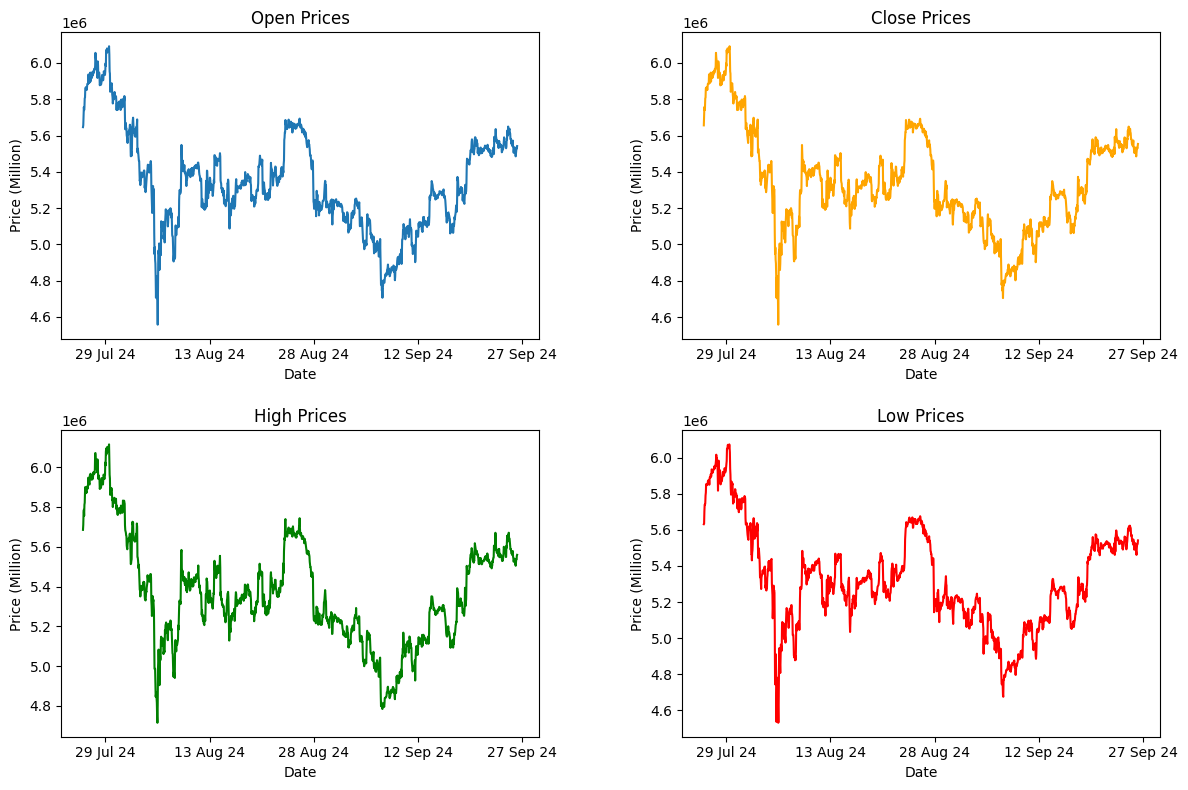

In [ ]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.lineplot(x=data_1h.index, y=data_1h['open'], ax=axs[0, 0])
axs[0, 0].set_title('Open Prices')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price (Million)')

sns.lineplot(x=data_1h.index, y=data_1h['close'], ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Close Prices')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price (Million)')

sns.lineplot(x=data_1h.index, y=data_1h['high'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('High Prices')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price (Million)')

sns.lineplot(x=data_1h.index, y=data_1h['low'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Low Prices')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price (Million)')

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %y'))

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

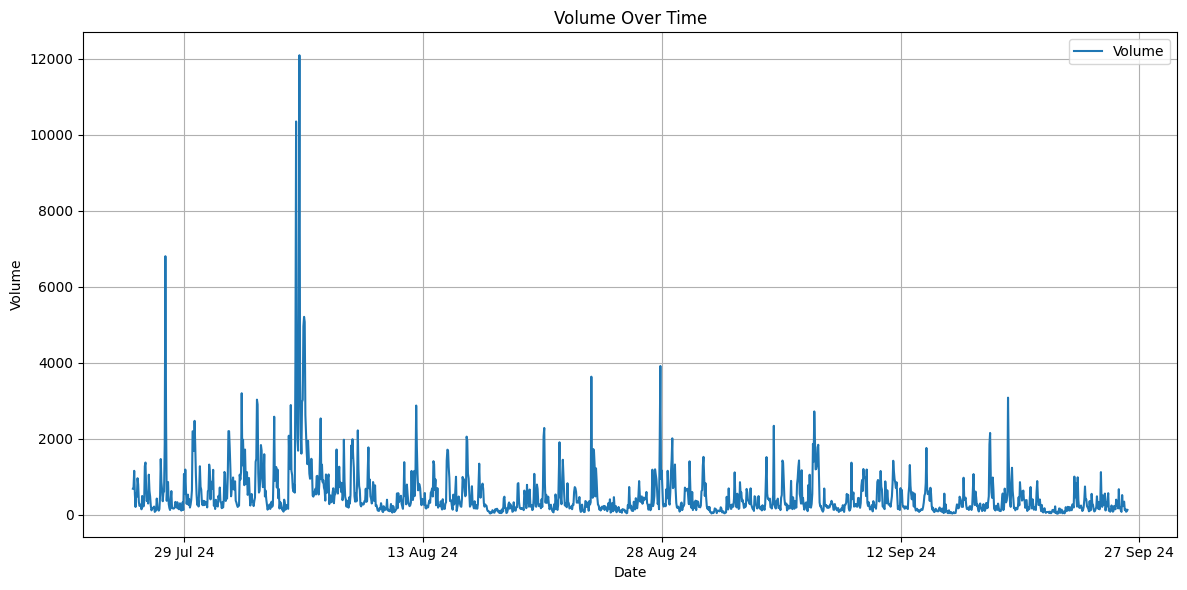

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(data_1h.index, data_1h['volume'], label='Volume')
plt.title('Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=15))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d %b %y'))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data_1h['day_of_month'] = data_1h.index.day
data_1h['day'] = data_1h.index.day_name()
data_1h['week_of_month'] = (data_1h.index.day-1)//8
data_1h['month'] = data_1h.index.month

In [ ]:
data_1h.head()

,open,high,low,close,volume,day,day_of_month,week_of_month,month
startTime,,,,,,,,,
2024-07-25 19:00:00,5646332,5684910,5631080,5656315,687.869,Thursday,25,3,7
2024-07-25 20:00:00,5657077,5710872,5633443,5709340,729.368,Thursday,25,3,7
2024-07-25 21:00:00,5709340,5772218,5702200,5757614,1159.287,Thursday,25,3,7
2024-07-25 22:00:00,5756905,5785842,5739616,5740132,545.354,Thursday,25,3,7
2024-07-25 23:00:00,5740132,5755260,5738758,5753248,208.241,Thursday,25,3,7


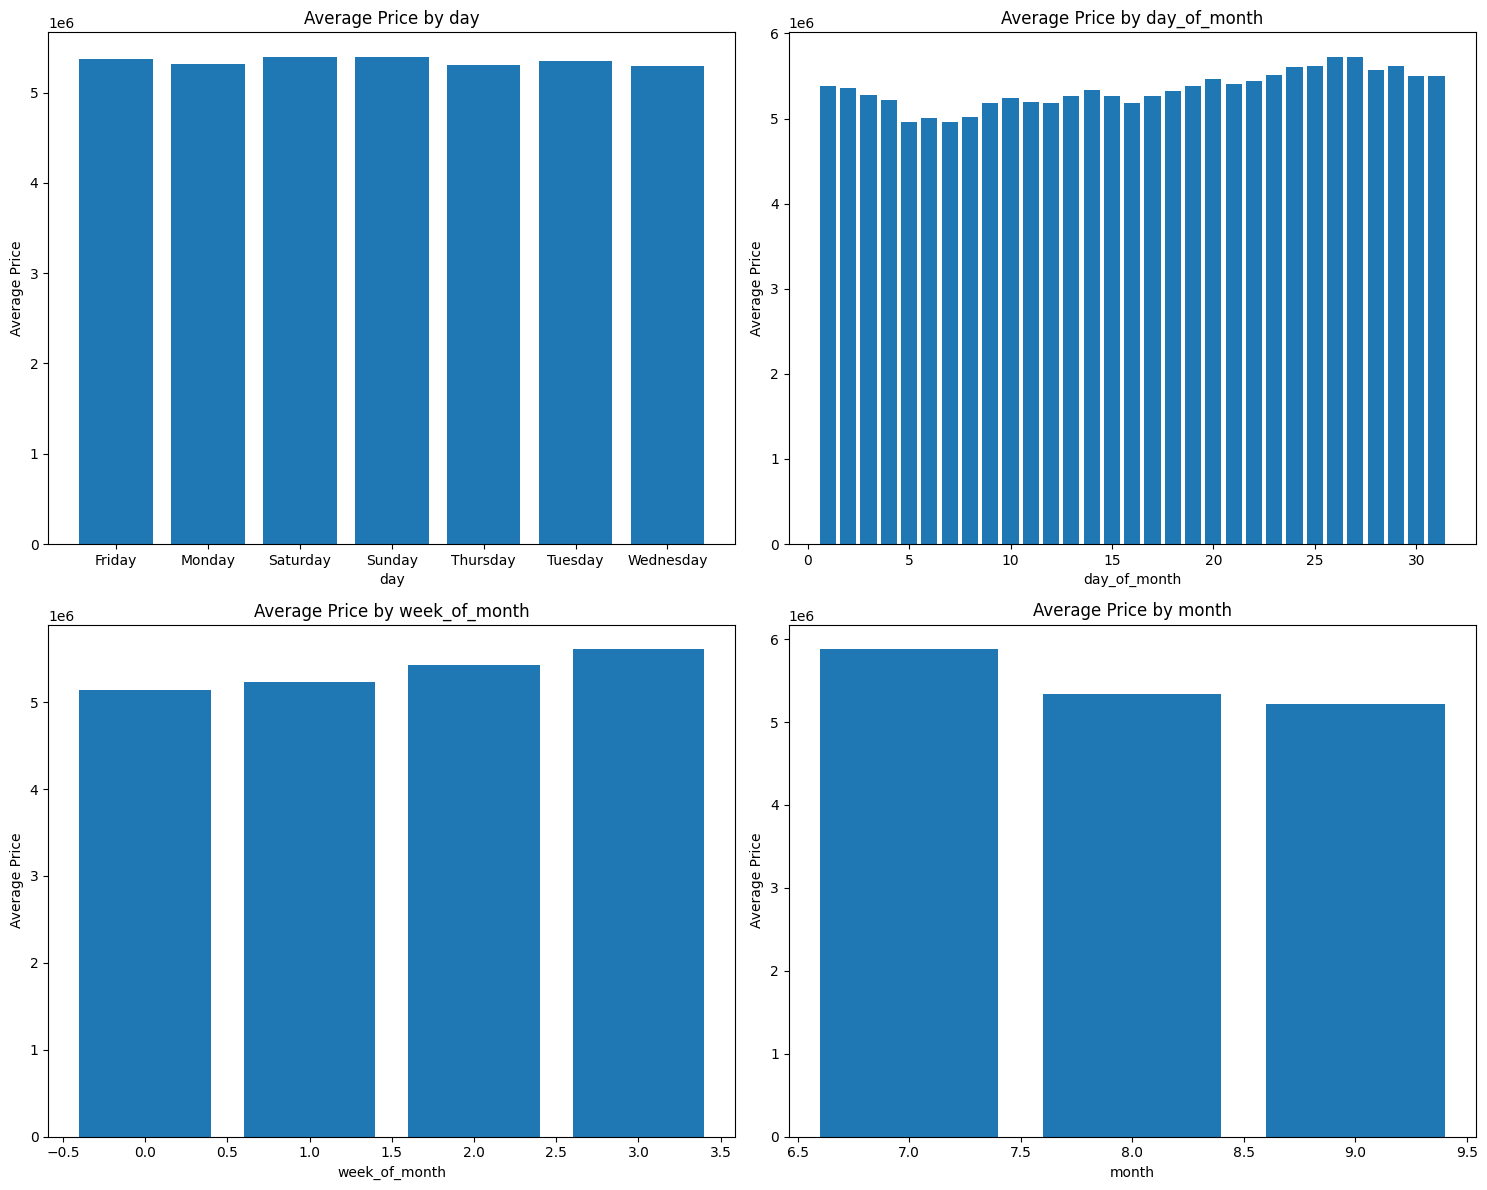

In [ ]:

columns_Analysis = ['day', 'day_of_month', 'week_of_month', 'month']
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

for i, col in enumerate(columns_Analysis):
    avg_price_by_col = data_1h.groupby(col)['open'].mean()
    axs[i//2, i%2].bar(avg_price_by_col.index, avg_price_by_col.values)
    axs[i//2, i%2].set_title(f'Average Price by {col}')
    axs[i//2, i%2].set_xlabel(col)
    axs[i//2, i%2].set_ylabel('Average Price')

plt.tight_layout()
plt.show()

In [ ]:
data_1h.drop(columns_Analysis,axis=1,inplace=True)
data_1h.head()

,open,high,low,close,volume
startTime,,,,,
2024-07-25 19:00:00,5646332,5684910,5631080,5656315,687.869
2024-07-25 20:00:00,5657077,5710872,5633443,5709340,729.368
2024-07-25 21:00:00,5709340,5772218,5702200,5757614,1159.287
2024-07-25 22:00:00,5756905,5785842,5739616,5740132,545.354
2024-07-25 23:00:00,5740132,5755260,5738758,5753248,208.241


<ipython-input-25-934e8c492194>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1h[col])
<ipython-input-25-934e8c492194>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1h[col])
<ipython-input-25-934e8c492194>:6: UserWarning: 

`distplot` is a deprecated function and will be removed 

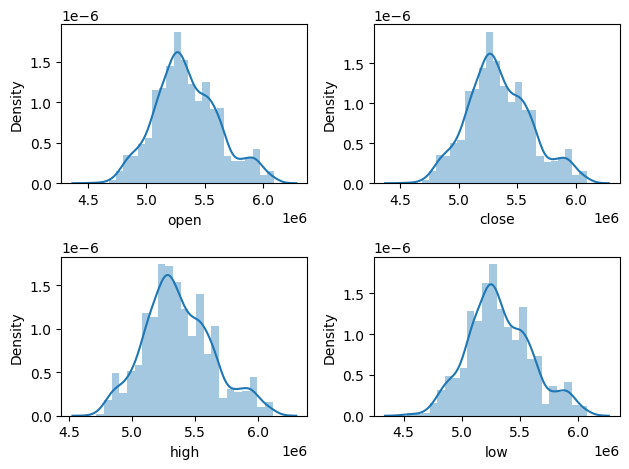

In [ ]:
#CHECKING THE DISTRIBUTION OF VARIBLES
features=['open','close','high','low']
i=1
for col in features:
  plt.subplot(2,2,i)
  sns.distplot(data_1h[col])
  i+=1
plt.tight_layout()
plt.show()

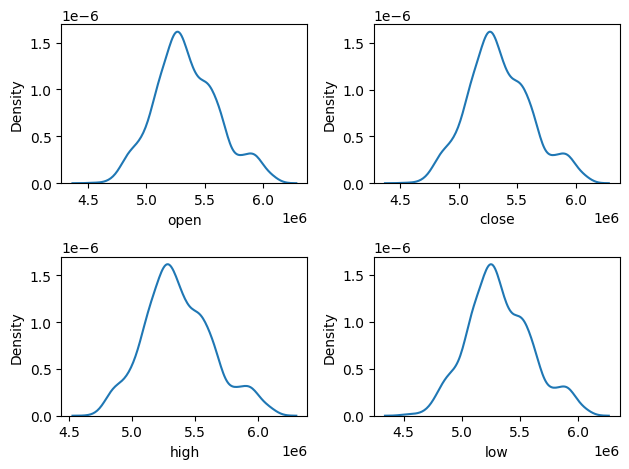

In [ ]:
i=1
for col in features:
  plt.subplot(2,2,i)
  sns.kdeplot(data_1h[col])
  i+=1
plt.tight_layout()
plt.show()

In [ ]:
data_1h.head()

,open,high,low,close,volume
startTime,,,,,
2024-07-25 19:00:00,5646332,5684910,5631080,5656315,687.869
2024-07-25 20:00:00,5657077,5710872,5633443,5709340,729.368
2024-07-25 21:00:00,5709340,5772218,5702200,5757614,1159.287
2024-07-25 22:00:00,5756905,5785842,5739616,5740132,545.354
2024-07-25 23:00:00,5740132,5755260,5738758,5753248,208.241


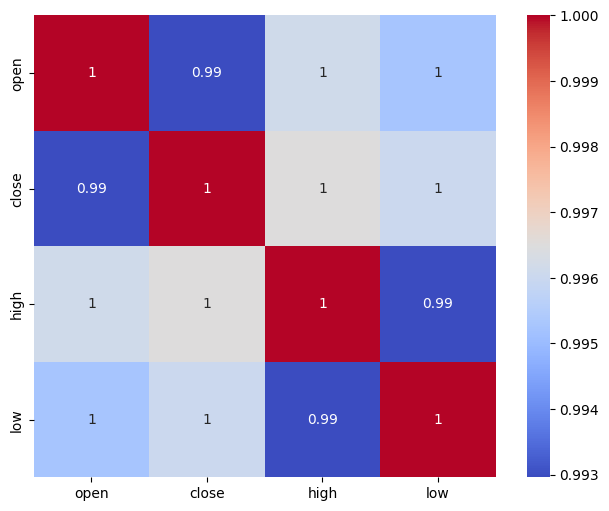

In [ ]:
#CHECKING THE CORRELATION AMONG VARIBLES
plt.figure(figsize=(8, 6))
sns.heatmap(data_1h[features].corr(), annot=True, cmap='coolwarm', square=True)
plt.show()

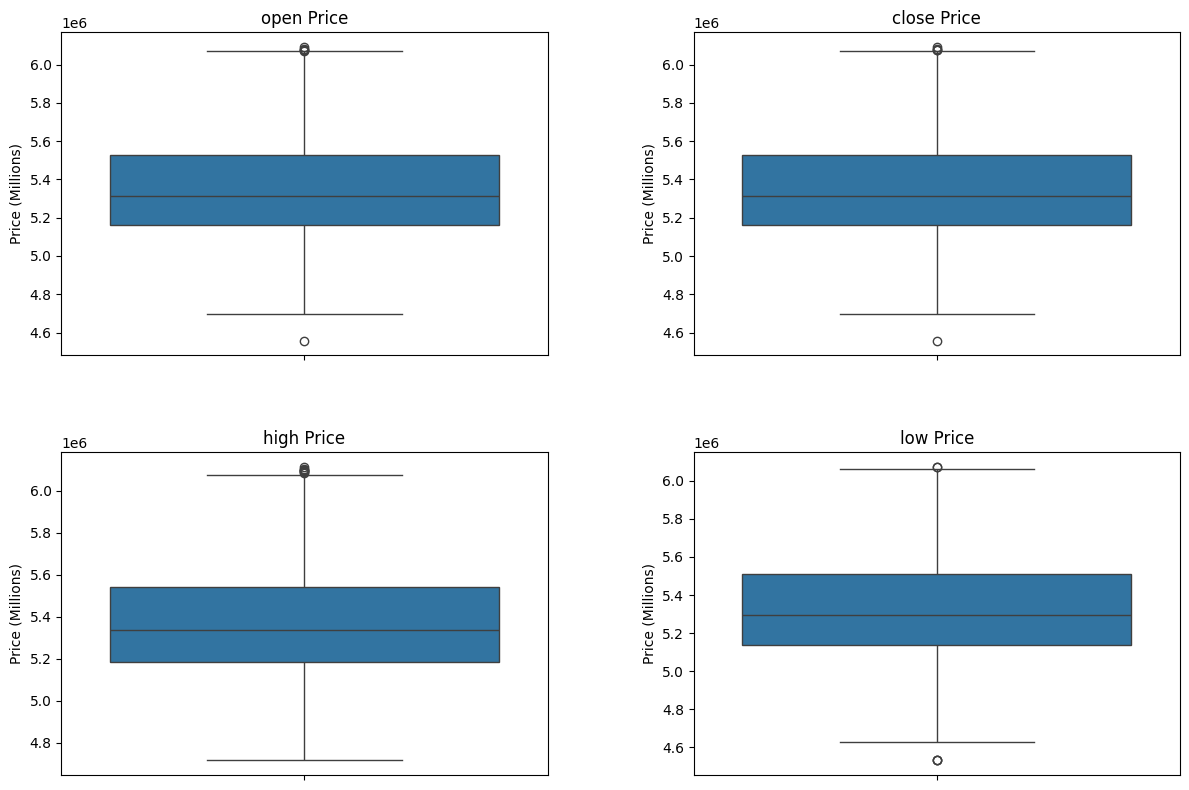

In [ ]:
#CHECKING THE OUTLIERS
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(features):
  sns.boxplot(data_1h[col], ax=axs[i//2, i%2])
  axs[i//2, i%2].set_title(f'{col} Price')
  axs[i//2, i%2].set_ylabel('Price (Millions)')

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [ ]:
q1=data_1h['open'].quantile(0.25)
q3=data_1h['open'].quantile(0.75)
iqr=q3-q1
data2=data_1h[(data_1h['open']>q3+1.5*(iqr)) | (data_1h['open']<q1-1.5*(iqr))]
data2

,open,high,low,close,volume
startTime,,,,,
2024-07-29 06:00:00,6080349,6100524,6070755,6074465,532.685
2024-07-29 07:00:00,6074099,6076491,6061274,6068957,260.955
2024-07-29 11:00:00,6077119,6097469,6073191,6073191,404.843
2024-07-29 12:00:00,6073191,6106409,6057983,6092231,649.131
2024-07-29 13:00:00,6092231,6114580,6028851,6046102,2199.383
2024-08-05 13:00:00,4557606,4803558,4535912,4752483,5210.728


In [ ]:
# SETTING OUTLIERS TO NEARBY VALUES LARGE VALUE OUTLIERS TO 0.95 QUANTILE , SMALLER TO 0.05 QUANTILE
for col in features:
  q1=data_1h[col].quantile(0.25)
  q3=data_1h[col].quantile(0.75)
  iqr=q3-q1
  data_1h[(data_1h[col]>q3+1.5*(iqr))][col]=data_1h[col].quantile(0.95)
  data_1h[(data_1h[col]<q1-1.5*(iqr))][col]=data_1h[col].quantile(0.05)


<ipython-input-29-69c8171761bc>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5885095.75' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_1h[(data_1h[col]>q3+1.5*(iqr))]=data_1h.quantile(0.95)
<ipython-input-29-69c8171761bc>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5895425.95' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_1h[(data_1h[col]>q3+1.5*(iqr))]=data_1h.quantile(0.95)
<ipython-input-29-69c8171761bc>:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '5866414.2' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_1h[(data_1h[col]>q3+1.5*(iqr))]=data_1h.quantile(0.95)
<ipython-input-29-69c8171761bc>:6: FutureWarning: Setting a

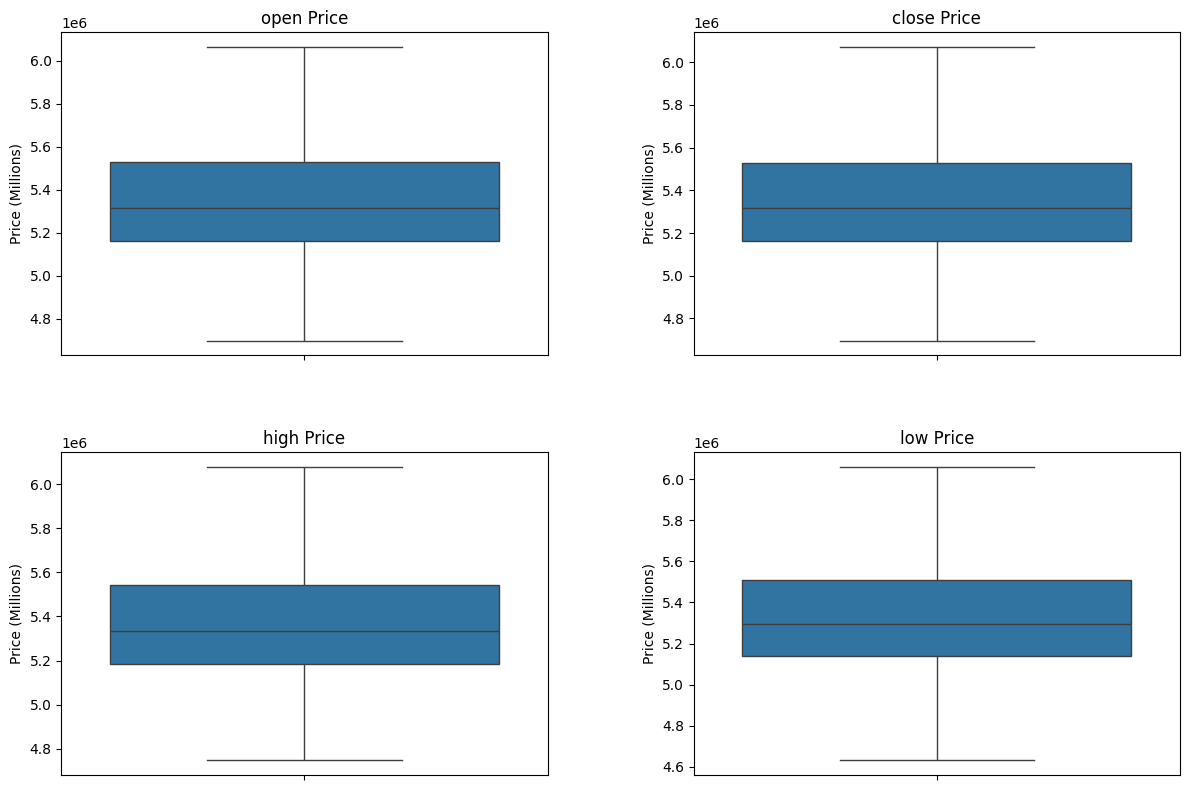

In [ ]:
#CHECKING THE OUTLIERS TO SEE IS SETTING OUTLIERS TO NEARBY VALUES WORKED OR NOT
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(features):
  sns.boxplot(data_1h[col], ax=axs[i//2, i%2])
  axs[i//2, i%2].set_title(f'{col} Price')
  axs[i//2, i%2].set_ylabel('Price (Millions)')

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

In [ ]:
# # CREATE THE TARGET COLUMN FOR open,close,high,low WHICH TELLS PRICE WILL INCREASE TODAY OR NOT (1/0)
# columns=list(data_1h.columns)[7:]
# data_1h.drop(columns,axis=1,inplace=True)


In [ ]:
# data_1h['tomorrow']=data_1h['open'].shift(-1)
# data_1h.head()

In [ ]:
# data_1h['target']=(data_1h['tomorrow']>data_1h['open']).astype(int)
# data_1h.head()

In [ ]:
# # columns=list(data_1h.columns)[7:]
# # data_1h.drop(columns,axis=1,inplace=True)
# data_1h.drop(['tomorrow','target'],axis=1,inplace=True)
# data_1h.head()

In [ ]:
# data_1h.drop('volume',axis=1,inplace=True)
# data_1h.head()

In [ ]:
# CREATE THE "TARGET" COLUMN FOR open,close,high,low WHICH TELLS PRICE WILL INCREASE TODAY OR NOT (1/0)
columns=list(data_1h.columns)
for i in columns:
  data_1h['tomorrow']=data_1h[i].shift(-1)
  target_col='target_'+i
  data_1h[target_col]=(data_1h['tomorrow']>data_1h[i]).astype(int)
  data_1h.drop(['tomorrow'],axis=1,inplace=True)
data_1h.head()

,open,high,low,close,volume,target_open,target_high,target_low,target_close,target_volume
startTime,,,,,,,,,,
2024-07-25 19:00:00,5646332.0,5684910.0,5631080.0,5656315.0,687.869,1,1,1,1,1
2024-07-25 20:00:00,5657077.0,5710872.0,5633443.0,5709340.0,729.368,1,1,1,1,1
2024-07-25 21:00:00,5709340.0,5772218.0,5702200.0,5757614.0,1159.287,1,1,1,0,0
2024-07-25 22:00:00,5756905.0,5785842.0,5739616.0,5740132.0,545.354,0,0,0,1,0
2024-07-25 23:00:00,5740132.0,5755260.0,5738758.0,5753248.0,208.241,1,1,1,1,1


In [ ]:
# col=list(data_1h.columns)[8:]
# data_1h.drop(col,axis=1,inplace=True)
# data_1h.head()

In [ ]:
#CALCULATE THE RSI

def calculate_rsi(data,price, k):
    delta = data[price]-data.shift(1)[price]
    gain = delta.apply(lambda x:x if x>0 else 0)
    loss = delta.apply(lambda x:-x if x<0 else 0)

    avg_gain = gain.rolling(k).mean()
    avg_loss = loss.rolling(k).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [ ]:
# CREATE NEW RATIO AND TREND COLUMN FOR EACH open, close, high, close
# FOR LAST 2,5,7 WHICH TELLS WHAT WAS RATIO OF TODAY PRICE TO MEAN OF LAST 2 hours(OR 5,7)
# AND HOW MANY TIMES DID PRICE ACTUALLY WENT UP IN LAST 2 hours(OR 5,7)
horizons=[2,7,15,50]
columns=list(data_1h.columns)[0:4]
print(columns)
for j in columns:
  for i in horizons:
    moving_average=data_1h[j].rolling(i).mean()
    data_1h[j+'_moving_avg_'+str(i)]=moving_average
    sum=data_1h['target_'+j].shift(1).rolling(i).sum()
    ratio_column=j+'_ratio_'+str(i)   # ratio_open2 -> ratio of open price to mean of it of last 2 hours
    data_1h[ratio_column]=data_1h[j]/moving_average
    trend_column = j+'_trend_'+str(i) # trend_open2 -> how many times was open price went up in last 2 hours
    data_1h[trend_column]=sum
    rsi_column=j+'_rsi_'+str(i)
    data_1h[rsi_column]=calculate_rsi(data_1h,j,i)
data_1h.head()

['open', 'high', 'low', 'close']


,open,high,low,close,volume,target_open,target_high,target_low,target_close,target_volume,...,close_trend_7,close_rsi_7,close_moving_avg_15,close_ratio_15,close_trend_15,close_rsi_15,close_moving_avg_50,close_ratio_50,close_trend_50,close_rsi_50
startTime,,,,,,,,,,,,,,,,,,,,,
2024-07-25 19:00:00,5646332.0,5684910.0,5631080.0,5656315.0,687.869,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25 20:00:00,5657077.0,5710872.0,5633443.0,5709340.0,729.368,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25 21:00:00,5709340.0,5772218.0,5702200.0,5757614.0,1159.287,1,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25 22:00:00,5756905.0,5785842.0,5739616.0,5740132.0,545.354,0,0,0,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25 23:00:00,5740132.0,5755260.0,5738758.0,5753248.0,208.241,1,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
price_to_predict=list(data_1h.columns)[:4]
price_to_predict

['open', 'high', 'low', 'close']

In [ ]:
data_1h.columns

Index(['open', 'high', 'low', 'close', 'volume', 'target_open', 'target_high',
       'target_low', 'target_close', 'target_volume', 'open_ratio_2',
       'open_rsi_2', 'open_trend_7', 'open_rsi_7', 'open_ratio_15',
       'open_trend_15', 'open_rsi_15', 'open_moving_avg_50', 'open_ratio_50',
       'open_trend_50', 'open_rsi_50', 'high_ratio_2', 'high_rsi_2',
       'high_trend_7', 'high_rsi_7', 'high_ratio_15', 'high_trend_15',
       'high_rsi_15', 'high_moving_avg_50', 'high_ratio_50', 'high_trend_50',
       'high_rsi_50', 'low_ratio_2', 'low_rsi_2', 'low_trend_7', 'low_rsi_7',
       'low_ratio_15', 'low_trend_15', 'low_rsi_15', 'low_moving_avg_50',
       'low_ratio_50', 'low_trend_50', 'low_rsi_50', 'close_ratio_2',
       'close_rsi_2', 'close_trend_7', 'close_rsi_7', 'close_ratio_15',
       'close_trend_15', 'close_rsi_15', 'close_moving_avg_50',
       'close_ratio_50', 'close_trend_50', 'close_rsi_50'],
      dtype='object')

In [ ]:
data_1h.dropna(inplace=True)
data_1h.shape

(1449, 74)

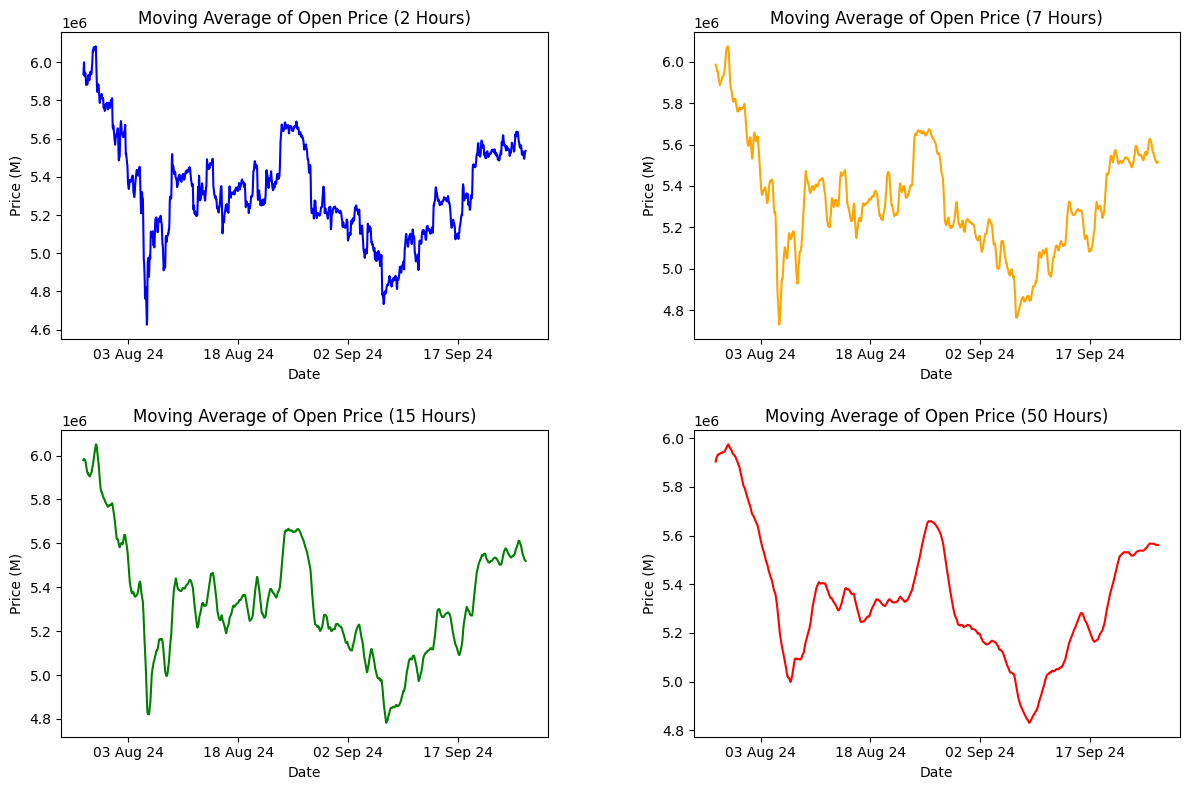

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

sns.lineplot(x=data_1h.index, y=data_1h['open_moving_avg_2'], ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Moving Average of Open Price (2 Hours)')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price (M)')

sns.lineplot(x=data_1h.index, y=data_1h['open_moving_avg_7'], ax=axs[0, 1], color='orange')
axs[0, 1].set_title('Moving Average of Open Price (7 Hours)')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price (M)')

sns.lineplot(x=data_1h.index, y=data_1h['open_moving_avg_15'], ax=axs[1, 0], color='green')
axs[1, 0].set_title('Moving Average of Open Price (15 Hours)')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price (M)')

sns.lineplot(x=data_1h.index, y=data_1h['open_moving_avg_50'], ax=axs[1, 1], color='red')
axs[1, 1].set_title('Moving Average of Open Price (50 Hours)')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price (M)')

for ax in axs.flat:
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=15))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%d %b %y'))

fig.tight_layout()
fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

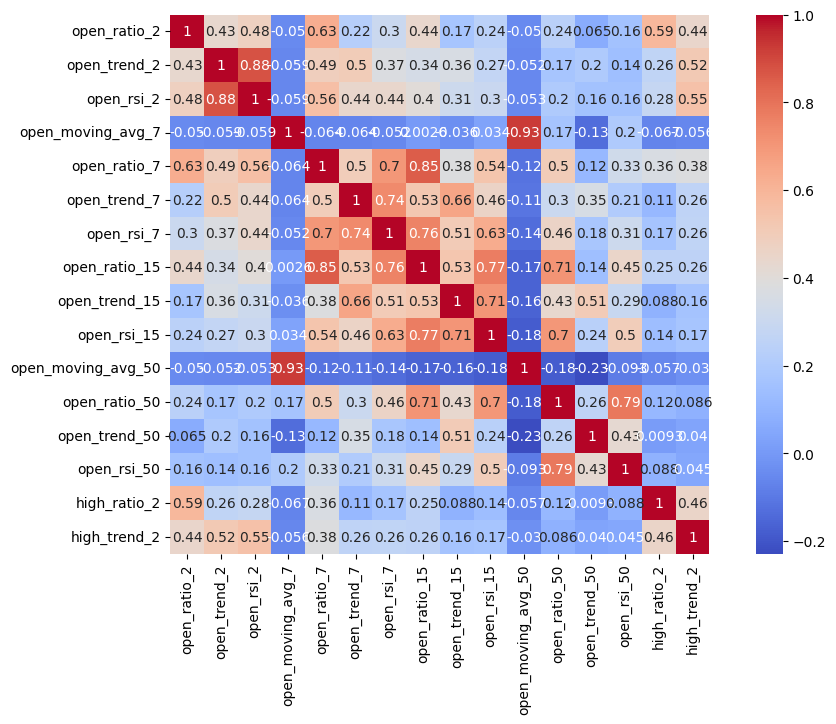

In [ ]:
new_columns=list(data_1h.columns)[10:26]
plt.figure(figsize=(12, 7))
sns.heatmap(data_1h[new_columns].corr(), annot=True, cmap='coolwarm', square=True)
plt.show()


In [ ]:
# HIGH CORRELATION AMONG MOVING AVERAGES    [trend_2,ratio_7]
for i in features:
  for j in [2,15]:
    cols=i+'_moving_avg_'+str(j)
    data_1h.drop(cols,axis=1,inplace=True)
data_1h.columns

Index(['open', 'high', 'low', 'close', 'volume', 'target_open', 'target_high',
       'target_low', 'target_close', 'target_volume', 'open_ratio_2',
       'open_trend_2', 'open_rsi_2', 'open_moving_avg_7', 'open_ratio_7',
       'open_trend_7', 'open_rsi_7', 'open_ratio_15', 'open_trend_15',
       'open_rsi_15', 'open_moving_avg_50', 'open_ratio_50', 'open_trend_50',
       'open_rsi_50', 'high_ratio_2', 'high_trend_2', 'high_rsi_2',
       'high_moving_avg_7', 'high_ratio_7', 'high_trend_7', 'high_rsi_7',
       'high_ratio_15', 'high_trend_15', 'high_rsi_15', 'high_moving_avg_50',
       'high_ratio_50', 'high_trend_50', 'high_rsi_50', 'low_ratio_2',
       'low_trend_2', 'low_rsi_2', 'low_moving_avg_7', 'low_ratio_7',
       'low_trend_7', 'low_rsi_7', 'low_ratio_15', 'low_trend_15',
       'low_rsi_15', 'low_moving_avg_50', 'low_ratio_50', 'low_trend_50',
       'low_rsi_50', 'close_ratio_2', 'close_trend_2', 'close_rsi_2',
       'close_moving_avg_7', 'close_ratio_7', 'close_tre

In [ ]:
for i in features:
  cols=[i+'_trend_'+str(2),i+'_ratio_'+str(7),i+'_moving_avg_'+str(7)]
  data_1h.drop(cols,axis=1,inplace=True)
data_1h.columns

Index(['open', 'high', 'low', 'close', 'volume', 'target_open', 'target_high',
       'target_low', 'target_close', 'target_volume', 'open_ratio_2',
       'open_rsi_2', 'open_trend_7', 'open_rsi_7', 'open_ratio_15',
       'open_trend_15', 'open_rsi_15', 'open_moving_avg_50', 'open_ratio_50',
       'open_trend_50', 'open_rsi_50', 'high_ratio_2', 'high_rsi_2',
       'high_trend_7', 'high_rsi_7', 'high_ratio_15', 'high_trend_15',
       'high_rsi_15', 'high_moving_avg_50', 'high_ratio_50', 'high_trend_50',
       'high_rsi_50', 'low_ratio_2', 'low_rsi_2', 'low_trend_7', 'low_rsi_7',
       'low_ratio_15', 'low_trend_15', 'low_rsi_15', 'low_moving_avg_50',
       'low_ratio_50', 'low_trend_50', 'low_rsi_50', 'close_ratio_2',
       'close_rsi_2', 'close_trend_7', 'close_rsi_7', 'close_ratio_15',
       'close_trend_15', 'close_rsi_15', 'close_moving_avg_50',
       'close_ratio_50', 'close_trend_50', 'close_rsi_50'],
      dtype='object')

In [ ]:
data_1h['target_close'].head()

,target_close
startTime,
2024-07-27 21:00:00,0
2024-07-27 22:00:00,0
2024-07-27 23:00:00,1
2024-07-28 00:00:00,1
2024-07-28 01:00:00,1


In [ ]:
data_1h.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1449 entries, 2024-07-27 21:00:00 to 2024-09-26 06:00:00
Data columns (total 54 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   open                 1449 non-null   float64
 1   high                 1449 non-null   float64
 2   low                  1449 non-null   float64
 3   close                1449 non-null   float64
 4   volume               1449 non-null   float64
 5   target_open          1449 non-null   int64  
 6   target_high          1449 non-null   int64  
 7   target_low           1449 non-null   int64  
 8   target_close         1449 non-null   int64  
 9   target_volume        1449 non-null   int64  
 10  open_ratio_2         1449 non-null   float64
 11  open_rsi_2           1449 non-null   float64
 12  open_trend_7         1449 non-null   float64
 13  open_rsi_7           1449 non-null   float64
 14  open_ratio_15        1449 non-null   float64
 15  op

In [ ]:
# SCALING THE DATA
exclude = ['target_open','target_close','target_high','target_low']
cols = [col for col in data_1h.columns if col not in exclude]
scaler = StandardScaler()
data_1h[cols] = scaler.fit_transform(data_1h[cols])
data_1h

,open,high,low,close,volume,target_open,target_high,target_low,target_close,target_volume,...,close_rsi_2,close_trend_7,close_rsi_7,close_ratio_15,close_trend_15,close_rsi_15,close_moving_avg_50,close_ratio_50,close_trend_50,close_rsi_50
startTime,,,,,,,,,,,,,,,,,,,,,
2024-07-27 21:00:00,2.335584,2.760591,2.331875,2.702381,3.446732,1,0,1,0,-0.942963,...,0.490943,-2.000463,-0.235096,0.391393,-1.387203,0.499847,2.315470,0.849925,0.877194,1.980505
2024-07-27 22:00:00,2.696050,2.639221,2.663043,2.620168,-0.207474,0,0,0,0,1.060487,...,0.785108,-2.000463,-0.298497,0.075698,-1.387203,0.334894,2.337836,0.634823,0.502362,1.621587
2024-07-27 23:00:00,2.617741,2.560039,2.398206,2.371797,0.461478,0,0,0,1,1.060487,...,-1.285824,-2.000463,-0.645040,-0.759521,-1.387203,-0.124760,2.351302,0.097081,0.127531,0.976984
2024-07-28 00:00:00,2.354781,2.369247,2.219545,2.393552,0.610958,1,1,1,1,-0.942963,...,-1.081197,-1.182554,-0.479610,-0.651532,-1.387203,-0.245708,2.366611,0.110656,0.502362,1.118334
2024-07-28 01:00:00,2.385615,2.440202,2.437420,2.435057,-0.340836,1,0,1,1,-0.942963,...,1.254999,-0.364644,-0.349982,-0.490063,-0.803901,-0.121457,2.381708,0.165153,0.502362,1.106083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-26 02:00:00,0.698652,0.701247,0.758990,0.770876,-0.615500,1,1,1,1,1.060487,...,1.254999,-0.364644,0.273078,-0.015528,-0.803901,-0.504748,0.910169,-0.286999,-0.996964,0.137167
2024-09-26 03:00:00,0.766006,0.760137,0.830343,0.822146,-0.564413,1,0,1,0,-0.942963,...,1.254999,-0.364644,-0.005527,0.183813,-0.220600,-0.072351,0.912053,-0.178946,-0.996964,0.209121
2024-09-26 04:00:00,0.820051,0.753870,0.843340,0.798102,-0.683542,0,1,1,1,1.060487,...,0.443833,-0.364644,-0.024783,0.121873,-0.803901,-0.330942,0.912156,-0.231735,-1.371795,0.044268


In [ ]:
train=data_1h.iloc[:-100]
test=data_1h.iloc[-100:]

In [ ]:
# FIND THE BEST MODEL USING GridSearchCV AND PRECISION SCORE AS METRIC
def find_model(train,test,predictors,target):
  X_train=train[predictors]
  y_train=train[target]
  X_test=test[predictors]
  y_test=test[target]
  models={'RandomForestClassifier':RandomForestClassifier(),'XGBClassifier':XGBClassifier()}

  params={'RandomForestClassifier':{
    'n_estimators': [100,150,200],
    'min_samples_split': [10,50,100]
},
          'XGBClassifier':{
    'n_estimators': [100,150,200],
    'learning_rate': [0.05, 0.1, 0.2,0.3]
  }
  }

  best_model,best_param,best_score=None,None,0
  for name in models:
    model=models[name]
    param=params[name]
    precision_scorer = make_scorer(precision_score)
    tscv = TimeSeriesSplit(n_splits=5)
    scorer=make_scorer(precision_score)
    grid_search = GridSearchCV(estimator=model,param_grid=param,scoring=scorer,cv=tscv)
    grid_search.fit(X_train,y_train)
    score=grid_search.best_score_
    if score>best_score:
      best_score=score
      best_model=grid_search.best_estimator_
      best_param=grid_search.best_params_

  predictions=best_model.predict(X_test)
  predictions=pd.Series(predictions,index=test.index,name='predicted')
  score=precision_score(y_test,predictions)
  return [best_model,best_param,score]

In [ ]:
data_1h.columns

Index(['open', 'high', 'low', 'close', 'volume', 'target_open', 'target_high',
       'target_low', 'target_close', 'target_volume', 'open_ratio_2',
       'open_rsi_2', 'open_trend_7', 'open_rsi_7', 'open_ratio_15',
       'open_trend_15', 'open_rsi_15', 'open_moving_avg_50', 'open_ratio_50',
       'open_trend_50', 'open_rsi_50', 'high_ratio_2', 'high_rsi_2',
       'high_trend_7', 'high_rsi_7', 'high_ratio_15', 'high_trend_15',
       'high_rsi_15', 'high_moving_avg_50', 'high_ratio_50', 'high_trend_50',
       'high_rsi_50', 'low_ratio_2', 'low_rsi_2', 'low_trend_7', 'low_rsi_7',
       'low_ratio_15', 'low_trend_15', 'low_rsi_15', 'low_moving_avg_50',
       'low_ratio_50', 'low_trend_50', 'low_rsi_50', 'close_ratio_2',
       'close_rsi_2', 'close_trend_7', 'close_rsi_7', 'close_ratio_15',
       'close_trend_15', 'close_rsi_15', 'close_moving_avg_50',
       'close_ratio_50', 'close_trend_50', 'close_rsi_50'],
      dtype='object')

In [ ]:
# FINDING THE BEST MODEL FOR EACH OF OPEN , CLOSE , HIGH , LOW PRICE PREDICTION
model_for={}
i=0
for price in price_to_predict:
  predictors=[price,'volume']
  cols=data_1h.columns[10+i*11:10+(i+1)*11]
  for j in cols:
    predictors.append(j)
  target='target_'+price
  model,param,score=find_model(train,test,predictors,target)
  model_for[price]=model
  i+=1
  # print(model,score)
  # backtest_score=backtest(model,data_1h,predictors,target)
  print(f'score for {price} price predictions : {score}')

score for open price predictions : 0.3783783783783784
score for high price predictions : 0.41379310344827586
score for low price predictions : 0.6842105263157895
score for close price predictions : 0.4782608695652174


In [ ]:
# WHICH MODEL WORKED BEST FOR WHICH PRICE
for price in price_to_predict:
  print(f'best model to predict {price} prices: {model_for[price]}')

best model to predict open prices: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
best model to predict high prices: RandomForestClassifier(min_samples_split=100, n_estimators=150)
best model to predict low prices: RandomForestClassifier(min_samples_split=10, n_estimators=200)
best model t

In [ ]:
# IMPLEMENTING BACKTESTING AND GETTING THE SCORE

def backtest(model,data,predictors,target,start=120,step=50):
  all_predictions=[]

  for i in range(start,len(data),step):
    predictions=[]
    train=data.iloc[0:i,:]
    test=data.iloc[i:(i+step),:]
    model.fit(train[predictors],train[target])
    predictions=model.predict(test[predictors])
    predictions=pd.Series(predictions,index=test.index,name='predicted')
    combined=pd.concat([test[target],predictions],axis=1)
    all_predictions.append(combined)

  combined=pd.concat(all_predictions)
  score=precision_score(combined[target],combined['predicted'])
  return score

In [ ]:
#GETTING THE BACKTEST SCORE
for price in price_to_predict:
  predictors=[price,'volume']
  cols=data_1h.columns[10+i*11:10+(i+1)*11]
  for j in cols:
    predictors.append(j)
  target='target_'+price
  model,param,score=find_model(train,test,predictors,target)
  target='target_'+price
  backtest_score=backtest(model_for[price],data_1h,predictors,target)
  print(f'backtest score for {price} price predictions : {score}')

backtest score for open price predictions : 0.41025641025641024
backtest score for high price predictions : 0.43478260869565216
backtest score for low price predictions : 0.6052631578947368
backtest score for close price predictions : 0.45454545454545453


In [ ]:
# # PREDICT THE PRICES FOR NEXT 30 DAYS
# for price in price_to_predict:
#   predictors=[price,'volume']
#   for i in horizons:
#     predictors.append(price+'_ratio_'+str(i))
#     predictors.append(price+'_trend_'+str(i))
#   target='target_'+price
#   model,param=model_for[price]
#   predictions=model.predict()
#   backtest_score=backtest(model,data_1h,predictors,target)
#   print(f'backtest score for {price} price predictions : {backtest_score} used model {model} with paramters {param}')

In [ ]:
# open['tomorrow']=open['open'].shift(-1)
# open.head()

,open,tomorrow
startTime,,
2024-07-25 19:00:00,5646332,5657077.0
2024-07-25 20:00:00,5657077,5709340.0
2024-07-25 21:00:00,5709340,5756905.0
2024-07-25 22:00:00,5756905,5740132.0
2024-07-25 23:00:00,5740132,5753957.0


In [ ]:
# open['target']=(open['tomorrow']>open['open']).astype(int)
# open.head()

,open,tomorrow,target
startTime,,,
2024-07-25 19:00:00,5646332,5657077.0,1
2024-07-25 20:00:00,5657077,5709340.0,1
2024-07-25 21:00:00,5709340,5756905.0,1
2024-07-25 22:00:00,5756905,5740132.0,0
2024-07-25 23:00:00,5740132,5753957.0,1


In [ ]:
# horizons=[2,7,14]
# for i in horizons:
#     moving_average=open['open'].rolling(i).mean()
#     sum=open['target'].shift(1).rolling(i).sum()
#     ratio_column='_ratio_'+str(i)   # ratio_open2 -> ratio of open price to mean of it of last 2 days
#     open[ratio_column]=open['open']/moving_average
#     trend_column ='trend_'+str(i) # trend_open2 -> how many times was open price went up in last 2 days
#     open[trend_column]=sum
#     rsi_column='rsi_'+str(i)
#     open[rsi_column]=calculate_rsi(open,'open',i)
# open.head()

,open,tomorrow,target,_ratio_2,trend_2,rsi_2,_ratio_7,trend_7,rsi_7,_ratio_14,trend_14,rsi_14
startTime,,,,,,,,,,,,
2024-07-25 19:00:00,5646332,5657077.0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25 20:00:00,5657077,5709340.0,1,1.000951,NaN,100.00000,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25 21:00:00,5709340,5756905.0,1,1.004598,2.0,100.00000,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25 22:00:00,5756905,5740132.0,0,1.004148,2.0,100.00000,NaN,NaN,NaN,NaN,NaN,NaN
2024-07-25 23:00:00,5740132,5753957.0,1,0.998541,1.0,73.92987,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# open.dropna(inplace=True)
# open.head()

,open,tomorrow,target,_ratio_2,trend_2,rsi_2,_ratio_7,trend_7,rsi_7,_ratio_14,trend_14,rsi_14
startTime,,,,,,,,,,,,
2024-07-26 09:00:00,5868652,5884524.0,1,1.001445,1.0,56.133607,1.001286,5.0,76.360458,1.011091,11.0,85.989018
2024-07-26 10:00:00,5884524,5885452.0,1,1.001350,2.0,100.000000,1.003401,5.0,65.696794,1.010996,11.0,86.217791
2024-07-26 11:00:00,5885452,5887919.0,1,1.000079,2.0,100.000000,1.003004,5.0,65.003301,1.008974,11.0,83.524198
2024-07-26 12:00:00,5887919,5886047.0,0,1.000210,2.0,100.000000,1.002899,5.0,64.452701,1.007781,11.0,80.109024
2024-07-26 13:00:00,5886047,5936945.0,1,0.999841,1.0,56.856419,1.001777,5.0,76.078146,1.005666,11.0,85.999062


In [ ]:
# model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=42)

In [ ]:
# X_train,y_train=open.iloc[:-30,[0,3,4,5,6,7,8,9,10,11]],open.iloc[:-30,2]
# X_test,y_test=open.iloc[-30:,[0,3,4,5,6,7,8,9,10,11]],open.iloc[-30:,2]

In [ ]:
# X_train.head(),y_train.head()

In [ ]:
# X_test.head(),y_test.head()

In [ ]:
# model.fit(X_train,y_train)
# preds=model.predict(X_test)
# score=precision_score(y_test,preds)
# score

In [ ]:
# predictors=list(open.columns[:-2])
# predictors

['open', 'ratio_open_2', 'ratio_open_5', 'ratio_open_7']

In [ ]:
# predictors=list(open.columns[:-2])

In [ ]:
# predictions=backtest(open,model)

In [ ]:
# combined=pd.concat(predictions)
# combined.head()

In [ ]:
# precision_score(combined['target'],combined['predictted'])

0.53125

In [ ]:
# combined['target'].value_counts()

,count
target,
1,106
0,97


In [ ]:
# combined[combined['target']==1].shape[0]/combined.shape[0]

In [ ]:
# open.head()